In [1]:
from dpll_eqnet import DPLL, EqnetDPLL, RandomClauseDPLL, MostCommonVarDPLL, RandomVarDPLL, EqnetDPLL
from dpll import get_random_ksat
from eqnet_format import mean, stdev
from matplotlib import pyplot as plt

Compiling Methods...
Compilation Finished...


In [2]:
def compute_steps(sats, dpll_cls):
    steps = []
    for sat in sats:
        dpll = dpll_cls()
        res = dpll.run(sat)
        assert res is not None
        steps.append(dpll.number_of_runs)
    return steps

In [3]:
def compute_and_print_steps(sats, dpll_cls):
    steps = compute_steps(sats, dpll_cls)
    print("#Sats: {}; avg step: {}; stdev step: {}".format(
        len(steps), mean(steps), stdev(steps)))
    plt.title("Steps of {}".format(dpll_cls.__name__))
    plt.hist(steps, bins=range(2**(N+1)))
    plt.show()

In [4]:
def print_all(s, k, n, m):
    global S, K, N, M
    S = s
    K = k
    N = n
    M = m
    
    MAX_TRIES = 10000
    sats = []
    for index in range(MAX_TRIES):
        if len(sats) >= S:
            break
        sat = get_random_ksat(K, N, M)
        if DPLL().run(sat) is not None:
            sats.append(sat)
    assert len(sats) == S
    #compute_and_print_steps(sats, DPLL)
    compute_and_print_steps(sats, RandomVarDPLL)
    compute_and_print_steps(sats, EqnetDPLL)
    compute_and_print_steps(sats, RandomClauseDPLL)
    compute_and_print_steps(sats, MostCommonVarDPLL)

#Sats: 400; avg step: 3.6925; stdev step: 1.1370768443689288


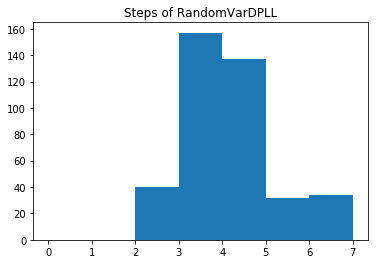

#Sats: 400; avg step: 3.2275; stdev step: 1.4250416660575225


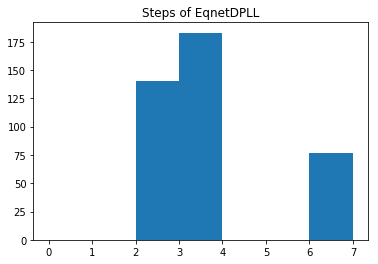

#Sats: 400; avg step: 3.0025; stdev step: 0.7566331673935537


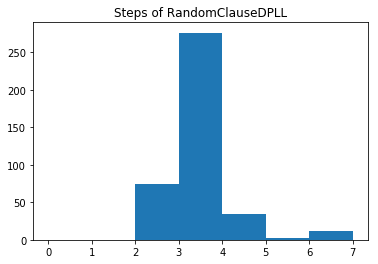

#Sats: 400; avg step: 2.685; stdev step: 0.5345792738219469


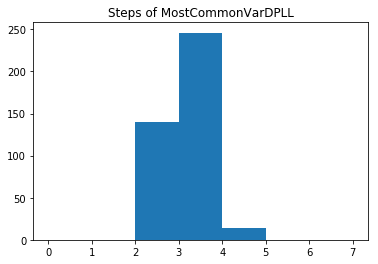

In [5]:
print_all(400, 2, 2, 3)

#Sats: 400; avg step: 4.365; stdev step: 1.5989918698980299


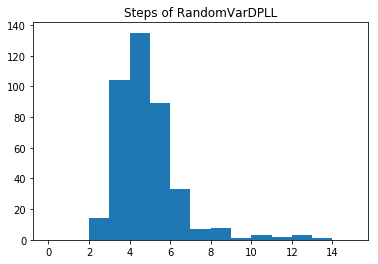

#Sats: 400; avg step: 4.01; stdev step: 2.2011133546457806


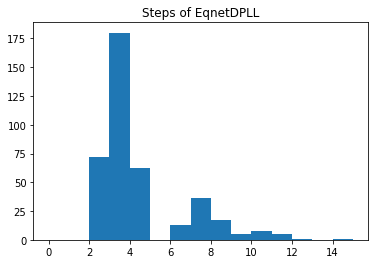

#Sats: 400; avg step: 3.3125; stdev step: 0.790470587688119


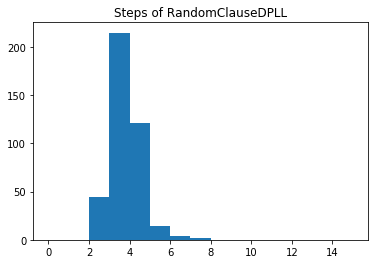

#Sats: 400; avg step: 2.955; stdev step: 0.6268771809533347


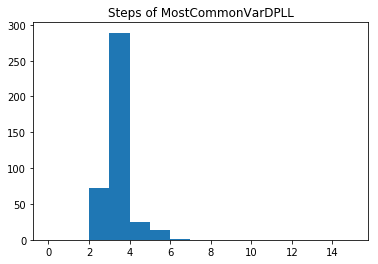

In [6]:
print_all(400, 2, 3, 3)

#Sats: 400; avg step: 5.0675; stdev step: 2.1824169514554272


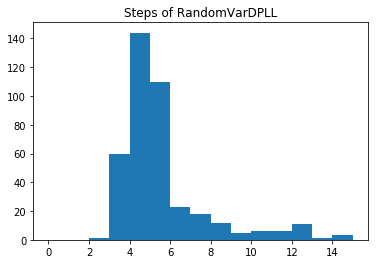

#Sats: 400; avg step: 4.93; stdev step: 2.585556033042023


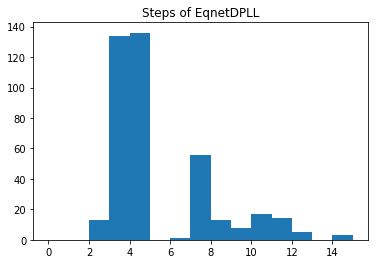

#Sats: 400; avg step: 4.0925; stdev step: 1.3412470876016827


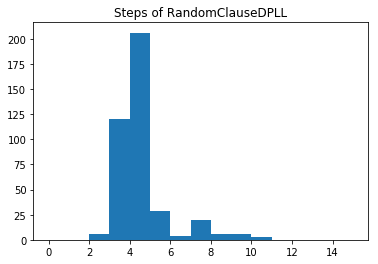

#Sats: 400; avg step: 3.35; stdev step: 0.7729812416870154


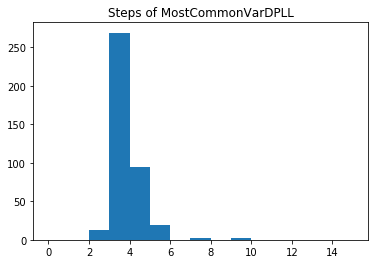

In [7]:
print_all(400, 3, 3, 6)

#Sats: 100; avg step: 12.48; stdev step: 6.462940507230435


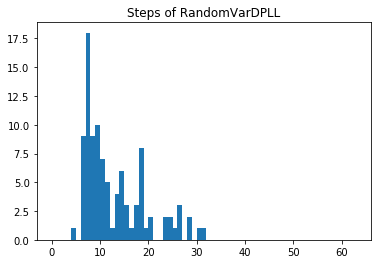

#Sats: 100; avg step: 16.3; stdev step: 9.752435593224906


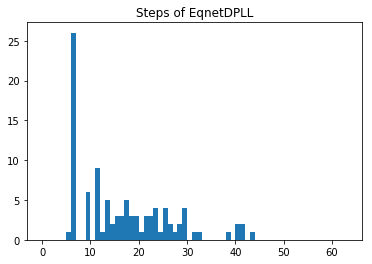

#Sats: 100; avg step: 10.94; stdev step: 6.15925320148474


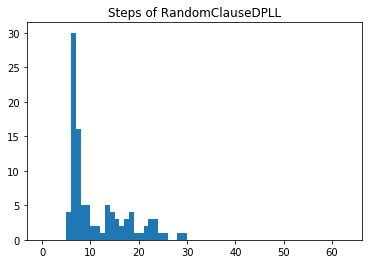

#Sats: 100; avg step: 7.15; stdev step: 3.3596874854664676


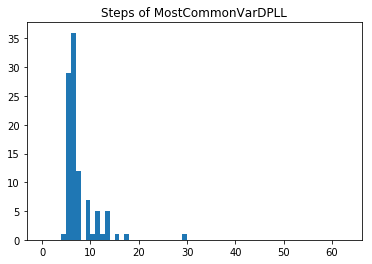

In [8]:
print_all(100, 3, 5, 20)